# EDA

#### importo el csv y reviso los datos

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/pablo/Desktop/proyecto_final/2017PurchasePricesDec.csv")


df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


(12261, 9)

In [5]:
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


#### mascara para identificar nulos por fila

In [28]:

mask = df.isna().any(axis=1)          # Series booleana por fila
rows_mask= df[mask]               #solo filas con nulos
rows_mask

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


#### conteo nulos


In [31]:
nulos = df.isnull().sum()
nulos

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

#### reviso el tipo de dato de cada columna

In [15]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','string','category']).columns.tolist()
num_cols, cat_cols

(['Brand', 'Price', 'Classification', 'PurchasePrice', 'VendorNumber'],
 ['Description', 'Size', 'Volume', 'VendorName'])

#### Top categorías y verificacion de 'unknown','na' y espacio en blanco en las columnas

In [27]:
for c in cat_cols[:5]:  
    vc = df[c].astype('string').str.strip().str.lower().value_counts(dropna=False).head(10)
    print(f"\n{c}  top10")
    display(vc)

print('=====================================================')

# detecta literales problemáticos
literals = {'unknown','na',''}
bad = {}
for c in cat_cols:
    s = df[c].astype('string').str.strip().str.lower()
    bad[c] = s.isin(literals).mean()
pd.Series(bad, name='%_valores_placeholder').sort_values(ascending=False).head(10)
    



Description  top10


Description
bacardi superior rum       7
jagermeister liqueur       7
jack daniels no 7 black    6
patron silver tequila      6
capt morgan spiced rum     6
jim beam                   6
chivas regal               5
bombay sapphire gin        5
hennessy vs cognac         5
amaretto disaronno         5
Name: count, dtype: Int64


Size  top10


Size
750ml         9823
1500ml         497
1750ml         433
1000ml         427
375ml          318
50ml           276
3000ml         104
187ml           52
500ml           51
187ml 4 pk      48
Name: count, dtype: Int64


Volume  top10


Volume
750     9840
1500     497
1750     433
1000     428
375      323
50       292
3000     104
187      104
500       51
5000      44
Name: count, dtype: Int64


VendorName  top10


VendorName
martignetti companies         1639
ultra beverage company llp     965
m s walker inc                 960
perfecta wines                 897
e & j gallo winery             527
constellation brands inc       481
pine state trading co          480
diageo north america inc       449
jim beam brands company        415
southern wine & spirits ne     408
Name: count, dtype: Int64

Size           0.000326
Volume         0.000326
Description    0.000000
VendorName     0.000000
Name: %_valores_placeholder, dtype: float64

#### valores unicos de size y volume

In [54]:
df['Volume'].unique(),df['Size'].unique()

(array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
        '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
        '650', '330', '18000', '180', '6000', '20', nan, '20000', '162.5',
        '400', '1100', '600', '19500', '560', '3750', '9000'], dtype=object),
 array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
        '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
        '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
        '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk', nan,
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3

#### verifico cuantos 'Unknown' hay en cada columna

In [53]:

def contar_unknown(df, col):
    s = df[col].astype('string').str.strip().str.casefold()
    return int((s == 'unknown').sum())

for col in df.columns:
    print(col, contar_unknown(df, col))



Brand 0
Description 0
Price 0
Size 4
Volume 4
Classification 0
PurchasePrice 0
VendorNumber 0
VendorName 0


In [ ]:
# copio el dataset para no hacer ningun cambio
df_eda = df.copy()

#NOMBRES DE COLUMNAS
price_col            = 'Price'          # precio del producto
purchase_price_col   = 'PurchasePrice'  # precio de compra
brand_col            = 'Brand'          # marca 
classification_col   = 'Classification' # categoría/tipo
size_col             = 'Size'           # presentación
volume_col           = 'Volume'         # volumen
vendor_name_col      = 'VendorName'     # proveedor
vendor_number_col    = 'VendorNumber'   # id proveedor
description_col      = 'Description'    # descripción


#Numéricas: convertir a número; si no se puede, quedan NaN
for c in [price_col, purchase_price_col, volume_col]:
    if c in df_eda.columns:
        df_eda[c] = pd.to_numeric(df_eda[c], errors='coerce')

# 2) Textuales / categóricas: a 'string' para análisis y limpieza básica
for c in [brand_col, classification_col, size_col, vendor_name_col, vendor_number_col, description_col]:
    if c in df_eda.columns:
        df_eda[c] = df_eda[c].astype('string').str.strip()

# Chequeo rápido de tipos resultantes
print(df_eda.dtypes)


Brand             string[python]
Description       string[python]
Price                    float64
Size              string[python]
Volume                   float64
Classification    string[python]
PurchasePrice            float64
VendorNumber      string[python]
VendorName        string[python]
dtype: object


#### graficos


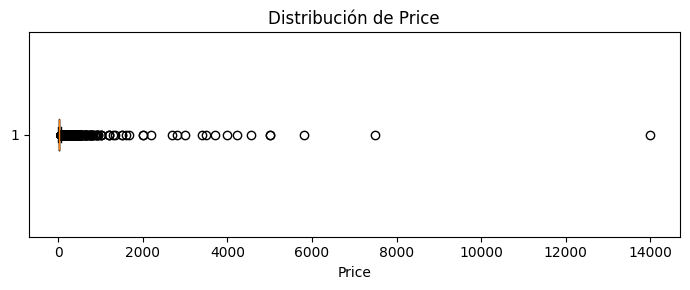

In [ ]:
#distribucion de price

s = df_eda[price_col].dropna()

plt.figure(figsize=(7,3))
plt.boxplot(s, vert=False)
plt.title('Distribución de Price')
plt.xlabel(price_col)       
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_79300\1162475811.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos, labels=orden_b, vert=True)


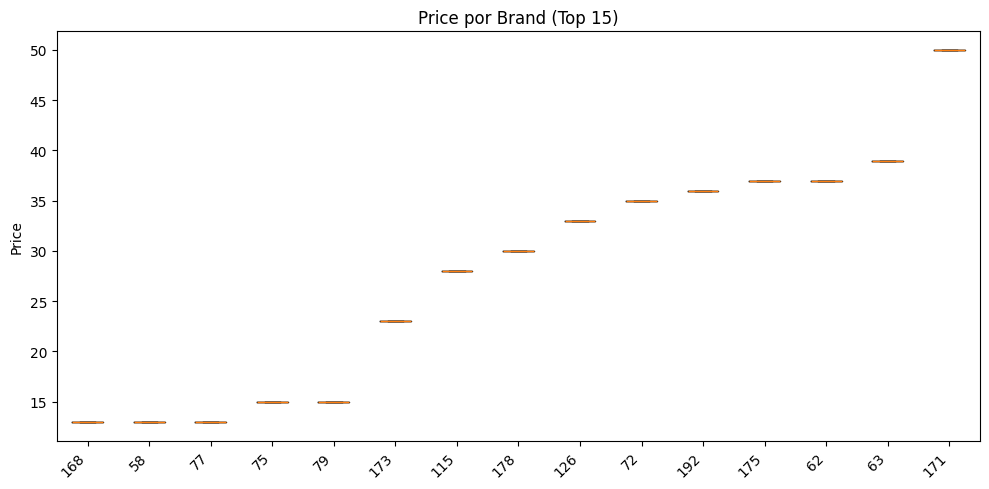

In [ ]:
#top 15 de brands


top_brands = (df_eda[brand_col]
              .dropna()
              .value_counts()
              .head(15)
              .index
              .tolist())

# Subconjunto para graficar
sub_b = df_eda[df_eda[brand_col].isin(top_brands)][[brand_col, price_col]].dropna()

# Ordeno marcas por mediana de precio (mejor lectura del boxplot)
orden_b = (sub_b.groupby(brand_col)[price_col]
                .median()
                .sort_values()
                .index
                .tolist())

# Boxplot manual respetando el orden
plt.figure(figsize=(10, 5))
datos = [sub_b.loc[sub_b[brand_col] == b, price_col] for b in orden_b]
plt.boxplot(datos, labels=orden_b, vert=True)
plt.xticks(rotation=45, ha='right')
plt.title(f'{price_col} por {brand_col} (Top 15)')
plt.ylabel(price_col)
plt.tight_layout()
plt.show()

C:\Users\pablo\AppData\Local\Temp\ipykernel_79300\3063206057.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_c, labels=orden_c, vert=True)


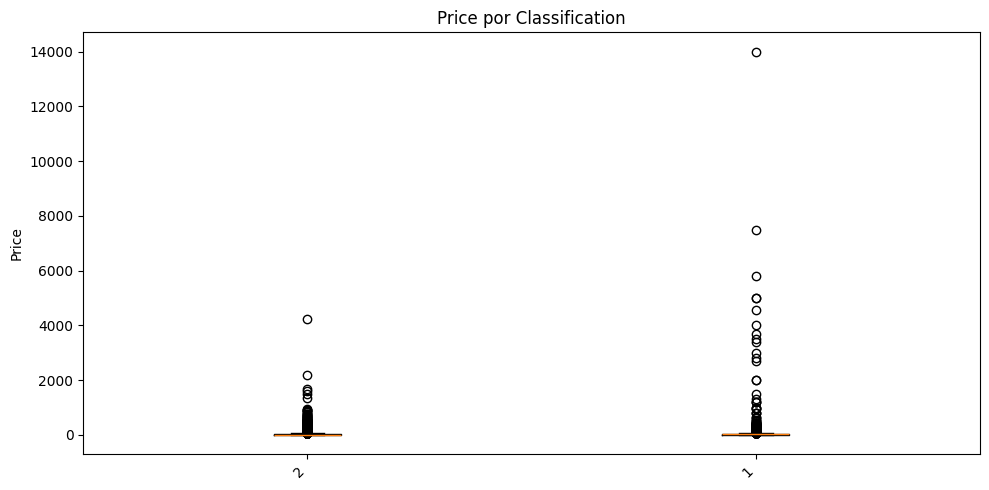

In [ ]:
# price por calssification


top_cls = (df_eda[classification_col]
           .dropna()
           .value_counts()
           
           .index
           .tolist())

sub_c = df_eda[df_eda[classification_col].isin(top_cls)][[classification_col, price_col]].dropna()

orden_c = (sub_c.groupby(classification_col)[price_col]
                .median()
                .sort_values()
                .index
                .tolist())

plt.figure(figsize=(10, 5))
datos_c = [sub_c.loc[sub_c[classification_col] == c, price_col] for c in orden_c]
plt.boxplot(datos_c, labels=orden_c, vert=True)
plt.xticks(rotation=45, ha='right')
plt.title(f'{price_col} por {classification_col}')
plt.ylabel(price_col)
plt.tight_layout()
plt.show()

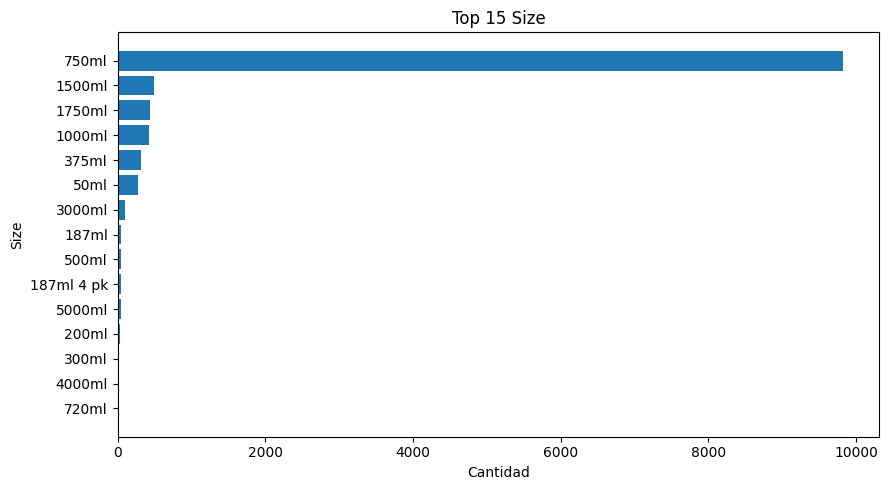

In [ ]:
#top 15 size

vc_size = (df_eda[size_col]
           .dropna()
           .str.lower()
           .value_counts()
           .head(15))

plt.figure(figsize=(9, 5))
plt.barh(y=vc_size.index[::-1], width=vc_size.values[::-1])
plt.title(f'Top 15 {size_col}')
plt.xlabel('Cantidad')
plt.ylabel(size_col)
plt.tight_layout()
plt.show()

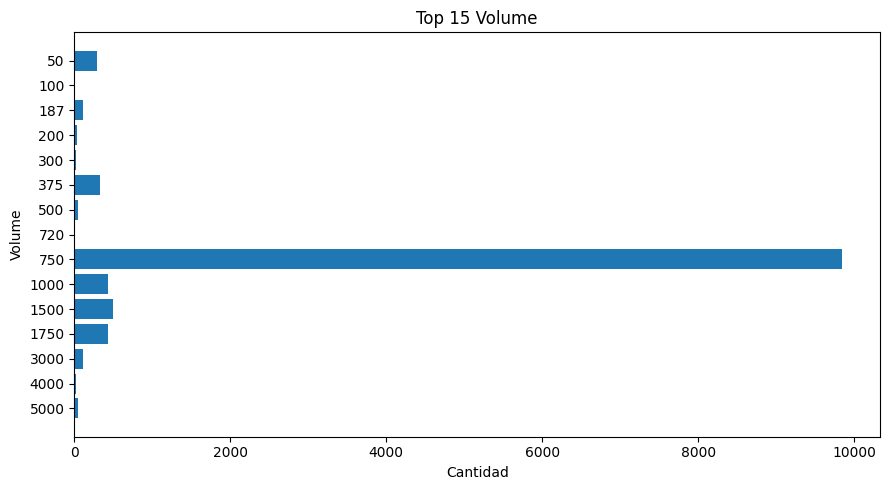

In [ ]:
#top 15 volume


vc_vol = (df_eda[volume_col]
          .dropna()
          .astype(float)
          .value_counts()
          .head(15)
          .sort_index())          # orden por valor

ypos = np.arange(len(vc_vol))

plt.figure(figsize=(9,5))
plt.barh(y=ypos, width=vc_vol.values[::-1])
plt.yticks(ypos, vc_vol.index[::-1].astype(int))   # etiquetas numéricas como texto
plt.title(f'Top 15 {volume_col}')
plt.xlabel('Cantidad')
plt.ylabel(volume_col)
plt.tight_layout()
plt.show()